In [1]:
#Exploratory data analysis with car data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [2]:
df = pd.read_csv(url, names = headers)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#replace "?" to nan
df.replace("?", np.nan, inplace = True)

In [5]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Identify missing values with the isnull and notnull method
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#We use a loop in Python to figure out the number of missing values in each column. Method .value_counts() counts the number of "True" values.
for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print("")

In [8]:
#To see which values are present in a particular column:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [14]:
#Calculating the mean of city-mpg and convert to a float
avg_city_mpg = df['city-mpg'].astype('float').mean(axis=0)

In [16]:
#Print the avg city mpg
print("Avg_city_mpg is:", avg_city_mpg)

Avg_city_mpg is: 25.21951219512195


In [17]:
#Replace nan with average city mpg
df['city-mpg'].replace(np.nan, avg_city_mpg, inplace = True)

In [18]:
#Drop a wholer ow with Nan in normalized-losses
df.dropna(subset=['normalized-losses'], axis=0, inplace = True)

In [19]:
#Reset the index in case we dropped a few rows
df.reset_index(drop=True, inplace = True)

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [21]:
#replace original value by original value / maximum value
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [28]:
#Printing two columns
print(df[["width", "length"]])

        width    length
0    0.923291  0.871668
1    0.926081  0.871668
2    0.995816  0.951135
3    0.995816  0.951135
4    0.903766  0.872655
..        ...       ...
159  0.960948  0.931885
160  0.959554  0.931885
161  0.960948  0.931885
162  0.960948  0.931885
163  0.960948  0.931885

[164 rows x 2 columns]


In [29]:
#Convert hosepower to int type
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [30]:
print(df["horsepower"])

0      102
1      115
2      110
3      140
4      101
      ... 
159    114
160    160
161    134
162    106
163    114
Name: horsepower, Length: 164, dtype: int32


(array([14., 45., 27., 24., 32.,  2.,  7., 11.,  1.,  1.]),
 array([ 48. ,  63.2,  78.4,  93.6, 108.8, 124. , 139.2, 154.4, 169.6,
        184.8, 200. ]),
 <BarContainer object of 10 artists>)

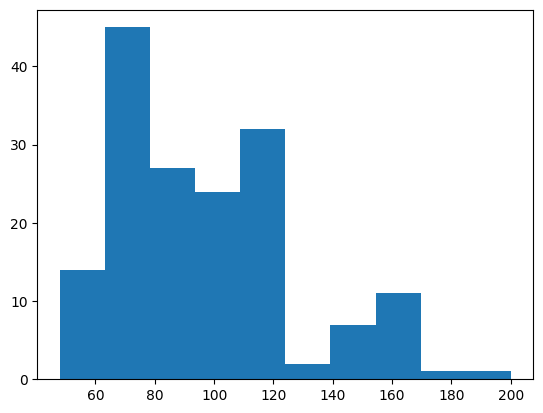

In [67]:
#Plotting a histogram of horsepower
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

Text(0.5, 1.0, 'horsepower bins')

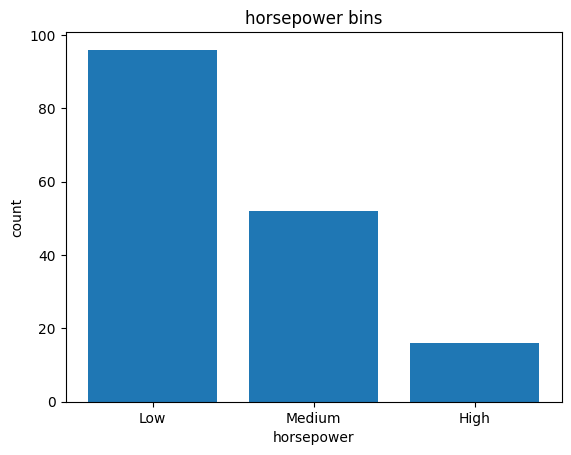

In [53]:
#Creating 3 equal size bin for the horsepower histogram
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest = True)
df[['horsepower', 'horsepower-binned']].head(20)
df["horsepower-binned"].value_counts()

#Plotting the distribution of each bin:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

#set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

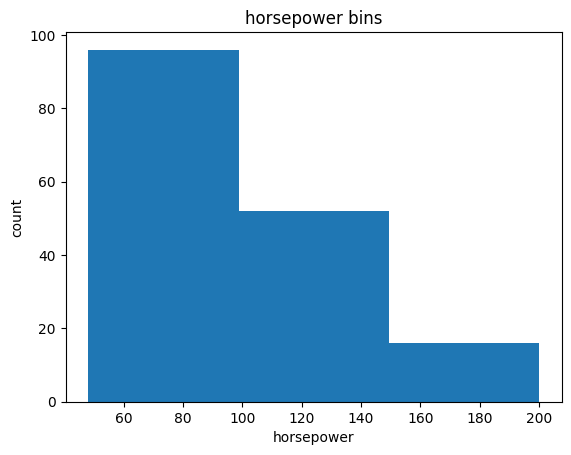

In [55]:
#Use a histogram instead to bin the data
plt.pyplot.hist(df["horsepower"], bins=3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [60]:
#Assigning dummy variables to categorical attributes
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()
dummy_variable_1.rename(columns = {'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [61]:
#Merge data frame and dummy variable 1
df = pd.concat([df, dummy_variable_1], axis=1)

In [62]:
#drop original column "fuel-type" from "df"
df.drop("fuel-type", axis=1, inplace=True)

In [63]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,horsepower-test,fuel-type-diesel,fuel-type-gas
0,2,164,audi,std,four,sedan,fwd,front,99.8,0.871668,...,10.0,102,5500,24,30,13950,Medium,1,False,True
1,2,164,audi,std,four,sedan,4wd,front,99.4,0.871668,...,8.0,115,5500,18,22,17450,Medium,1,False,True
2,1,158,audi,std,four,sedan,fwd,front,105.8,0.951135,...,8.5,110,5500,19,25,17710,Medium,1,False,True
3,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.951135,...,8.3,140,5500,17,20,23875,Medium,1,False,True
4,2,192,bmw,std,two,sedan,rwd,front,101.2,0.872655,...,8.8,101,5800,23,29,16430,Medium,1,False,True


In [ ]:
#Scatter plot of engine size (independent variable, conventionally on x-axis)
#and price (dependent variable, conventionally on y-axis)
y = df["price"]
x = df["engine-size"]
plt.scatter(x, y)

In [72]:
#Using group by
df_test = df[['drive-wheels', 'body-style', 'price']]
df_group = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.0
1,4wd,sedan,5816974437086.333008
2,4wd,wagon,20032792369747196.0
3,fwd,hardtop,8249.0
4,fwd,hatchback,1144806567939195207714197807089415133637443626...
5,fwd,sedan,2735328843605404962336847717837072110447847294...
6,fwd,wagon,9913032859442221180386293295670624256.0
7,rwd,convertible,1752808834.5
8,rwd,hardtop,70442112490977800.0
9,rwd,hatchback,7817941750974654090961794658826959138769016817...


In [75]:
df_pivot = df_group.pivot(index = 'drive-wheels', columns='body-style')
df_pivot

price                        
body-style     convertible              hardtop   
drive-wheels                                      
4wd                    NaN                  NaN  \
fwd                    NaN               8249.0   
rwd           1752808834.5  70442112490977800.0   

                                                                  
body-style                                            hatchback   
drive-wheels                                                      
4wd                                                      7603.0  \
fwd           1144806567939195207714197807089415133637443626...   
rwd           7817941750974654090961794658826959138769016817...   

                                                                  
body-style                                                sedan   
drive-wheels                                                      
4wd                                        5816974437086.333008  \
fwd           2735328843605404962336847717837072110447847294...   
rwd           6319295866191161913205342855433891883118205469...   

                                                       
body-style                                      wagon  
drive-wheels                                           
4wd                               20032792369747196.0  
fwd           9913032859442221180386293295670624256.0  
rwd                             7062033537912880128.0